<a href="https://colab.research.google.com/github/ferdinann/Rekomendasi_product/blob/main/recommendation_system_product.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Library

In [ ]:
import kagglehub
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from joblib import dump, load
from sklearn.metrics import silhouette_score,davies_bouldin_score,calinski_harabasz_score
from sklearn.metrics import precision_score, recall_score

## Instalasi dataset yang diambil dari kaggle

In [2]:
# Download latest version
path = kagglehub.dataset_download("ferdinantaginting/data-product")

print("Path to dataset files:", path)

100%|██████████| 20.3M/20.3M [00:00<00:00, 124MB/s] 

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/ferdinantaginting/data-product/versions/1


## Memastikan dataset dapat dibaca

In [3]:
# List files in the directory
files = os.listdir(path)

for file in files:
    file_path = os.path.join(path, file)

    if file.endswith(".csv"):
        try:
            df = pd.read_csv(file_path)
            print(f"\n--- CSV File: {file} ---")
            print("Lima baris pertama:")
            print(df.head())

        except Exception as e:
            print(f"Error reading CSV file {file}: {e}")


--- CSV File: events.csv ---
Lima baris pertama:
                event_time event_type  product_id          category_id  \
0  2020-09-24 11:57:06 UTC       view     1996170  2144415922528452715   
1  2020-09-24 11:57:26 UTC       view      139905  2144415926932472027   
2  2020-09-24 11:57:27 UTC       view      215454  2144415927158964449   
3  2020-09-24 11:57:33 UTC       view      635807  2144415923107266682   
4  2020-09-24 11:57:36 UTC       view     3658723  2144415921169498184   

                   category_code        brand   price              user_id  \
0          electronics.telephone          NaN   31.90  1515915625519388267   
1    computers.components.cooler       zalman   17.16  1515915625519380411   
2                            NaN          NaN    9.81  1515915625513238515   
3  computers.peripherals.printer       pantum  113.81  1515915625519014356   
4                            NaN  cameronsino   15.87  1515915625510743344   

  user_session  
0   LJuJVLEjPT  
1 

## Membaca dataset dan menampilkan 5 data teratas

In [4]:
df.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2020-09-24 11:57:06 UTC,view,1996170,2144415922528452715,electronics.telephone,NaN,31.90,1515915625519388267,LJuJVLEjPT
1,2020-09-24 11:57:26 UTC,view,139905,2144415926932472027,computers.components.cooler,zalman,17.16,1515915625519380411,tdicluNnRY
2,2020-09-24 11:57:27 UTC,view,215454,2144415927158964449,NaN,NaN,9.81,1515915625513238515,4TMArHtXQy
3,2020-09-24 11:57:33 UTC,view,635807,2144415923107266682,computers.peripherals.printer,pantum,113.81,1515915625519014356,aGFYrNgC08
4,2020-09-24 11:57:36 UTC,view,3658723,2144415921169498184,NaN,cameronsino,15.87,1515915625510743344,aa4mmk0kwQ


## Menampilkan informasi dari data

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 885129 entries, 0 to 885128
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   event_time     885129 non-null  object 
 1   event_type     885129 non-null  object 
 2   product_id     885129 non-null  int64  
 3   category_id    885129 non-null  int64  
 4   category_code  648910 non-null  object 
 5   brand          672765 non-null  object 
 6   price          885129 non-null  float64
 7   user_id        885129 non-null  int64  
 8   user_session   884964 non-null  object 
dtypes: float64(1), int64(3), object(5)
memory usage: 60.8+ MB


## Menampilkan deskripsi dari data

In [6]:
df.describe()

,product_id,category_id,price,user_id
count,8.851290e+05,8.851290e+05,885129.000000,8.851290e+05
mean,1.906621e+06,2.144423e+18,146.328713,1.515916e+18
std,1.458708e+06,6.165105e+14,296.807683,3.747287e+07
min,1.020000e+02,2.144416e+18,0.220000,1.515916e+18
25%,6.988030e+05,2.144416e+18,26.460000,1.515916e+18
50%,1.452883e+06,2.144416e+18,65.710000,1.515916e+18
75%,3.721194e+06,2.144416e+18,190.490000,1.515916e+18
max,4.183880e+06,2.227847e+18,64771.060000,1.515916e+18


## Melihat jumlah data null/kosong pada data


In [7]:
df.isnull().sum()

,0
event_time,0
event_type,0
product_id,0
category_id,0
category_code,236219
brand,212364
price,0
user_id,0
user_session,165


## Menghapus data null pada semua baris data

In [8]:
df.dropna(inplace=True)

## Mengecek apakah masih ada data null

In [9]:
df.isnull().sum()

,0
event_time,0
event_type,0
product_id,0
category_id,0
category_code,0
brand,0
price,0
user_id,0
user_session,0


## Menampilkan jumlah data duplicate

In [10]:
df.duplicated().sum()

np.int64(401)

## Menghapus data duplicate

In [11]:
df.drop_duplicates(inplace=True)

## Menampilkan jumlah data uniq pada setiap feature pada data

In [12]:
print(df.nunique())

event_time       501143
event_type            3
product_id        24255
category_id         260
category_code       104
brand               728
price              9478
user_id          224971
user_session     273421
dtype: int64


## Menampilkan data uniq pada kolom 'event_type'

In [13]:
df['event_type'].unique()

array(['view', 'cart', 'purchase'], dtype=object)

## Membuat fungsi untuk memisahkan feature category_code menjadi 3 bagian yang berbeda berdasarkan karakter titik dan membuat 3 feature baru yaitu kategory, subcategory dan product.

In [14]:
def split_feature(df, col):
    def kategori(x):
        levels = x.split('.')
        while len(levels) < 3:
            levels.append('0')
        return levels

    df['category'], df['subcategory'], df['product'] = zip(*df[col].apply(kategori))

split_feature(df, 'category_code')

# Menyamakan tipe data kolom yang telah diekstrak
df['category'] = df['category'].astype('category')
df['subcategory'] = df['subcategory'].astype('category')
df['product'] = df['product'].astype('category')

## Mengubah event_type menjadi rating

In [15]:
event_type_to_rating = {'view': 1, 'cart': 3, 'purchase': 5}
df['rating'] = df['event_type'].map(event_type_to_rating)

## Memilih data yang panjang data yang split nya sama dengan 3 saja

In [16]:
df = df[df['category_code'].apply(lambda x: len(x.split('.')) == 3)]

## Menghapus kolom category_id dan category_code

In [17]:
df.drop(columns=['category_id', 'category_code'], inplace=True)

## Menampilkan nilai uniq pada setiap kolom dalam dataset

In [18]:
df.nunique()

,0
event_time,371670
event_type,3
product_id,15030
brand,569
price,8063
user_id,153683
user_session,189988
category,7
subcategory,14
product,76


## Menampilkan bar plot untuk distribusi data feature "event_type"

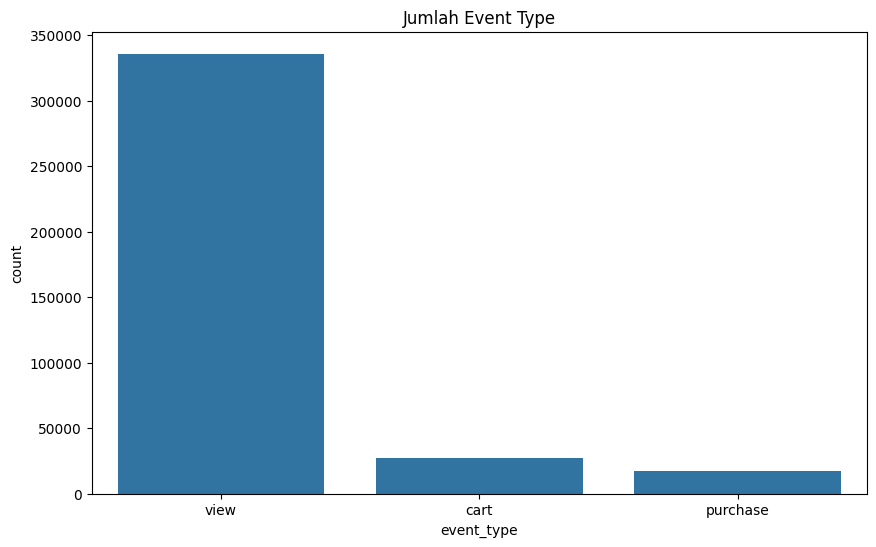

In [19]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='event_type')
plt.title('Jumlah Event Type')
plt.show()

## Menampilkan grafik hanya untuk event_type "purchase" dan diurutkan berdasarkan jumlah pembelian terbanyak.

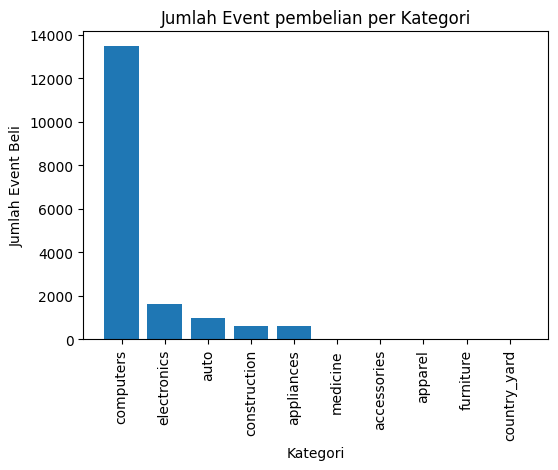

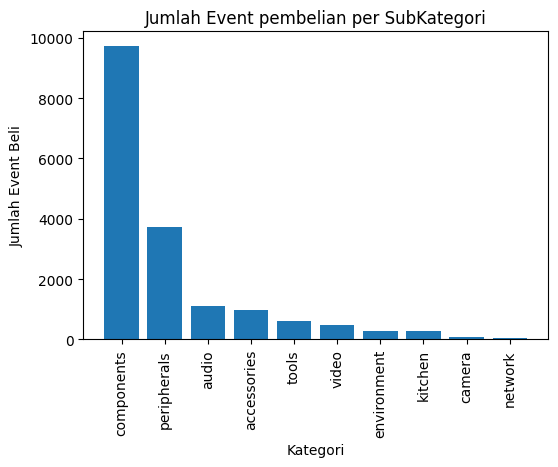

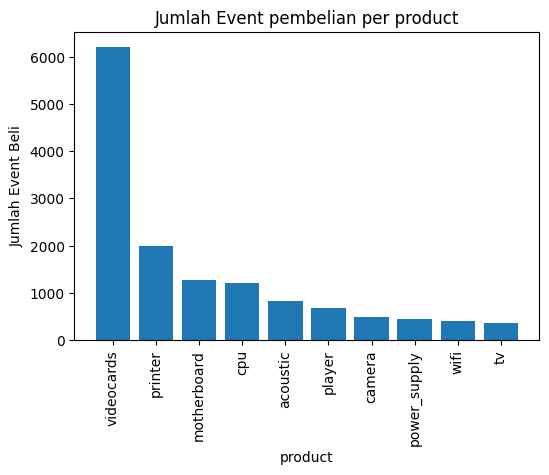

In [20]:
# Filter data hanya untuk event_type 'pembelian'
df_beli = df[df['event_type'] == 'purchase']

num = 10
# Hitung jumlah kejadian untuk setiap kategori dalam event_type 'pembelian'
category_counts = df_beli['category'].value_counts()
subcategory1_counts = df_beli['subcategory'].value_counts()
product_counts = df_beli['product'].value_counts()

# Buat bar plot
plt.figure(figsize=(6, 4))
plt.bar(category_counts.index[:num], category_counts[:num])
plt.title('Jumlah Event pembelian per Kategori')
plt.xlabel('Kategori')
plt.ylabel('Jumlah Event Beli')
plt.xticks(rotation=90)  # Rotasi label x jika terlalu panjang
plt.show()

plt.figure(figsize=(6, 4))
plt.bar(subcategory1_counts.index[:num], subcategory1_counts[:num])
plt.title('Jumlah Event pembelian per SubKategori')
plt.xlabel('Kategori')
plt.ylabel('Jumlah Event Beli')
plt.xticks(rotation=90)  # Rotasi label x jika terlalu panjang
plt.show()

plt.figure(figsize=(6, 4))
plt.bar(product_counts.index[:num], product_counts[:num])
plt.title('Jumlah Event pembelian per product')
plt.xlabel('product')
plt.ylabel('Jumlah Event Beli')
plt.xticks(rotation=90)  # Rotasi label x jika terlalu panjang
plt.show()

## Menampilkan sample data yang sudah bersih dan siap digunakan

In [21]:
df.sample(5)

,event_time,event_type,product_id,brand,price,user_id,user_session,category,subcategory,product,rating
557769,2021-01-06 14:32:23 UTC,view,4101539,gigabyte,269.40,1515915625573157374,zqmYo3WiA9,computers,components,videocards,1
474991,2020-12-20 19:32:27 UTC,view,4183863,palit,577.60,1515915625564068071,xryNCjOXYU,computers,components,videocards,1
668231,2021-01-23 22:02:30 UTC,view,4099645,gigabyte,292.83,1515915625596382745,xO2pahzrDL,computers,components,videocards,1
476383,2020-12-21 05:46:21 UTC,view,73593,sennheiser,103.48,1515915625566073718,VsFLDSBYEI,electronics,audio,headphone,1
91957,2020-10-15 10:11:23 UTC,view,16237,sven,18.10,1515915625353900095,12dadbda-acb5-4f26-a5e8-f71814190c04,computers,peripherals,camera,1


# Rekomendasi dengan Demographic Filtering (Bast Seller)

### Menghapus beberapa feature karena tidak diperlukan dalam menemukan product best seller

In [22]:
graficFilter = df.drop(columns=['event_type', 'category', 'user_id', 'event_time', 'user_session'])

### Menampilkan informasi dari data yang akan digunakan

In [23]:
graficFilter.info()

<class 'pandas.core.frame.DataFrame'>
Index: 380325 entries, 1 to 885128
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype   
---  ------       --------------   -----   
 0   product_id   380325 non-null  int64   
 1   brand        380325 non-null  object  
 2   price        380325 non-null  float64 
 3   subcategory  380325 non-null  category
 4   product      380325 non-null  category
 5   rating       380325 non-null  int64   
dtypes: category(2), float64(1), int64(2), object(1)
memory usage: 15.2+ MB


### Menginisialisasi variabel untuk menyimpan data yang sudah di filter dan jumlah pembelian untuk setiap product lalu menampilkan 10 data pembelian teratas.

In [24]:
# Filter data untuk event_type 'purchase' dan rating 5
df_beli = graficFilter[(graficFilter['rating'] == 5)]

# Hitung jumlah kejadian untuk setiap subcategory2
subcategory2_counts = df_beli['product'].value_counts()

# Ambil 10 data teratas
top_10_subcategories = subcategory2_counts.head(10)


for product, count in top_10_subcategories.items():
    print(f"{product}: {count}")

videocards: 6220
printer: 1999
motherboard: 1266
cpu: 1213
acoustic: 817
player: 685
camera: 489
power_supply: 449
wifi: 404
tv: 360


### Menyimpan 10 nama produk terlaris dalam variabel recomBS

In [25]:
recomBS = ['videocards', 'printer', 'motherboard', 'cpu', 'acoustic',
                               'player', 'camera', 'power_supply', 'wifi', 'tv']
recomBS

['videocards',
 'printer',
 'motherboard',
 'cpu',
 'acoustic',
 'player',
 'camera',
 'power_supply',
 'wifi',
 'tv']

### Menginisialisasi variabel untuk menyimpan semua produk yang memiliki value yang sama seperti pada variabel recomBS


In [26]:
df_reko = df_beli[df_beli['product'].isin(recomBS)]

### Menghapus feature "rating"


In [27]:
df_reko.drop(columns=['rating'], inplace=True)

/tmp/ipython-input-2415262236.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reko.drop(columns=['rating'], inplace=True)


### Menampilkan jumlah data null dan jumlah data yang *duplicate*

In [28]:
print(df_reko.isnull().sum())
print(df_reko.duplicated().sum())

product_id     0
brand          0
price          0
subcategory    0
product        0
dtype: int64
12752


### Menghapus data duplicate, menampilkan jumlah data duplicate, data uniq dan bentuk data.

In [29]:
df_reko.drop_duplicates(inplace=True)
print(df_reko.duplicated().sum())
print(df_reko.nunique())
print(df_reko.shape)

0
product_id     1150
brand           124
price          1011
subcategory       5
product          10
dtype: int64
(1150, 5)


/tmp/ipython-input-3404162094.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reko.drop_duplicates(inplace=True)


In [30]:
df_reko['subcategory'].unique()

['components', 'peripherals', 'audio', 'accessories', 'video']
Categories (40, object): ['accessories', 'audio', 'bag', 'bathroom', ..., 'toys', 'video', 'watering',
                          'weather_station']

### Menampilkan 10 data yang dipilih secara acak sebagai rekomendasi product best seller.

In [31]:
df_reko.sample(10)

,product_id,brand,price,subcategory,product
775353,1248293,hp,156.95,peripherals,printer
31254,3758800,netproduct,31.02,peripherals,printer
207957,4005380,msi,236.37,components,motherboard
57471,16116,sven,16.05,peripherals,camera
49948,817333,logitech,38.37,peripherals,camera
828239,1674551,amd,53.49,components,cpu
699354,1444307,digma,32.51,accessories,player
156728,482057,canon,154.06,peripherals,printer
548292,665275,alpine,202.38,accessories,player
37967,4155379,sapphire,254.38,components,videocards


# Cluster Based Algorithm

### Menghapus beberapa feature yang tidak digunakan dalam membuat model based

In [32]:
dataclass = df.drop(columns=['event_type', 'event_time', 'user_session', 'category', 'rating', 'price','product_id', 'user_id'], errors='ignore')
dataclass

,brand,subcategory,product
1,zalman,components,cooler
3,pantum,peripherals,printer
5,carver,tools,saw
7,d-link,network,router
9,d-link,network,router
...,...,...,...
885120,asus,components,cdrw
885121,asus,components,cdrw
885122,msi,components,videocards
885125,starwind,video,tv


## Menampilkan jumlah data duplicate

In [33]:
dataclass.duplicated().sum()

np.int64(378873)

## Menghapus data duplicate

In [34]:
dataclass.drop_duplicates(inplace=True)

### Meng Encode feature non numerik menjadi numerik untuk mempermudah proses clustering

In [35]:
le1 = LabelEncoder()
le2 = LabelEncoder()
le3 = LabelEncoder()

dataclass['subcategory'] = le1.fit_transform(dataclass['subcategory'])
dataclass['product'] = le2.fit_transform(dataclass['product'])
dataclass['brand'] = le3.fit_transform(dataclass['brand'])

In [36]:
datcol = dataclass.columns

## Standarisasi data agar memiliki skala yang sama

In [37]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
dataclass = scaler.fit_transform(dataclass)

### Menampilkan grafik untuk menentukan jumlah kluster yang optimal

Nilai K optimal berdasarkan Silhouette Score: 18


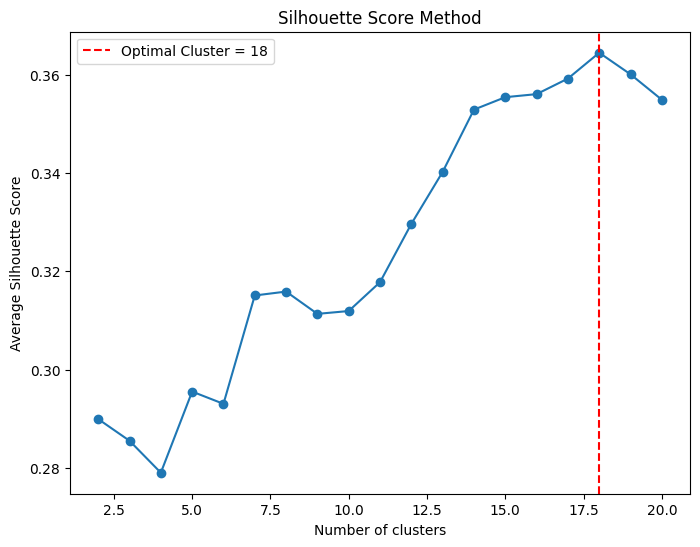

In [39]:
silhouette_scores = []
# Silhouette score tidak bisa dihitung untuk k=1, jadi mulai dari 2
k_range_silhouette = range(2, 21)

for i in k_range_silhouette:
    kmeans = KMeans(n_clusters=i, random_state=0, n_init=10).fit(dataclass)
    # Hitung silhouette score
    score = silhouette_score(dataclass, kmeans.labels_)
    silhouette_scores.append(score)

# Cari K dengan silhouette score TERTINGGI
optimal_k_silhouette = k_range_silhouette[np.argmax(silhouette_scores)]
print(f"Nilai K optimal berdasarkan Silhouette Score: {optimal_k_silhouette}")

# Plotting Silhouette Score
plt.figure(figsize=(8, 6))
plt.plot(k_range_silhouette, silhouette_scores, marker='o')
plt.title('Silhouette Score Method')
plt.xlabel('Number of clusters')
plt.ylabel('Average Silhouette Score')
plt.axvline(x=optimal_k_silhouette, color='red', linestyle='--', label=f'Optimal Cluster = {optimal_k_silhouette}')
plt.legend()
plt.show()

### Membuat model clustering untuk mengelompokkan data

In [40]:
km = KMeans(n_clusters=optimal_k_silhouette, random_state=42)
km.fit(dataclass)

KMeans(n_clusters=18, random_state=42)

In [41]:
labels = km.labels_
labels

array([13, 11,  6, ...,  7,  3,  6], dtype=int32)

## Save model

In [42]:
dump(km, 'cluster_model.joblib')

['cluster_model.joblib']

## Evaluasi model Clustering

In [43]:
ss = silhouette_score(dataclass, labels)
dba = davies_bouldin_score(dataclass, labels)
chs = calinski_harabasz_score(dataclass,labels)

## Menampilkan nilai dari ke-3 metriks evaluasi

In [44]:
print("Silhouette Score:", ss)
print("Davies-Bouldin Index:", dba)
print("Calinski-Harabasz Index:", chs)

Silhouette Score: 0.3486572869552472
Davies-Bouldin Index: 0.8883690266362531
Calinski-Harabasz Index: 619.9196095528309


## Mendecoding data yang sudah di standarisasi

In [45]:
dataclass = scaler.inverse_transform(dataclass)
dataclass

array([[559.,   5.,  12.],
       [385.,  10.,  46.],
       [ 89.,  12.,  52.],
       ...,
       [ 78.,   5.,  40.],
       [475.,   6.,  65.],
       [ 99.,  10.,  54.]])

## Konversi feature yang telah di encode sebelumnya ke bentuk semua

In [46]:
dataclass = pd.DataFrame(dataclass, columns=datcol)

# Convert 'subcategory', 'product', and 'brand' columns to int before inverse_transform
dataclass['subcategory'] = dataclass['subcategory'].astype(int)
dataclass['product'] = dataclass['product'].astype(int)
dataclass['brand'] = dataclass['brand'].astype(int)

dataclass['subcategory'] = le1.inverse_transform(dataclass['subcategory'])
dataclass['product'] = le2.inverse_transform(dataclass['product'])
dataclass['brand'] = le3.inverse_transform(dataclass['brand'])

dataclass

,brand,subcategory,product
0,zalman,components,cooler
1,pantum,peripherals,printer
2,carmega,tools,saw
3,d-link,network,router
4,ricoh,peripherals,printer
...,...,...,...
1447,ginzzu,accessories,videoregister
1448,tantos,accessories,videoregister
1449,cablexpert,components,network_adapter
1450,sprintus,environment,vacuum


### Membuat feature baru dengan value labels dari data model yang sudah dilatih

In [47]:
dataclass = pd.DataFrame(dataclass, columns=dataclass.columns)
dataclass['cluster'] = km.labels_
dataclass

,brand,subcategory,product,cluster
0,zalman,components,cooler,13
1,pantum,peripherals,printer,11
2,carmega,tools,saw,6
3,d-link,network,router,6
4,ricoh,peripherals,printer,11
...,...,...,...,...
1447,ginzzu,accessories,videoregister,17
1448,tantos,accessories,videoregister,8
1449,cablexpert,components,network_adapter,7
1450,sprintus,environment,vacuum,3


### Menampilkan jumlah value dari pengemlompokan data yang sudah di kluster

In [48]:
dataclass['cluster'].value_counts()

,count
cluster,
11,142
6,141
9,105
12,98
4,92
2,91
13,88
7,82
15,82


## Menampilkan data dengan cluster yang sama

In [49]:
def tampilkan_cluster_sama(dft, product):
  # Cari cluster dari product yang diberikan
  cluster_user = dft[dft['product'] == product]['cluster'].values

  # Jika product tidak ditemukan, kembalikan None
  if len(cluster_user) == 0:
    return None

  cluster = cluster_user[0]

  # Filter DataFrame untuk hanya cluster yang sama
  df_cluster_sama = dft[dft['cluster'] == cluster]

  # Ambil 10 baris teratas
  df_10_teratas = df_cluster_sama.head(10)

  return df_10_teratas

dft = pd.DataFrame (dataclass, columns=dataclass.columns)
dft['cluster'] = km.labels_
user_id_input = 'cooler'

hasil = tampilkan_cluster_sama(dft, user_id_input)

if hasil is not None:
  print(hasil)
else:
  print("product tidak ditemukan.")

       brand  subcategory         product  cluster
0     zalman   components          cooler       13
70    lenovo   components          cooler       13
74   philips      kitchen         blender       13
85    magnit      kitchen           fryer       13
91   redmond      kitchen  coffee_machine       13
101    sinbo      kitchen         blender       13
103  polaris  environment      air_heater       13
131    titan   components          cooler       13
143  polaris      kitchen  coffee_machine       13
158  mallony      kitchen  coffee_machine       13


# Content base filtering

## Menghapus beberapa feature yang tidak digunakan untuk rekomendasi content base filtering

In [50]:
contentBased = df.drop(columns=['event_type', 'category', 'event_time', 'user_session', 'rating', 'user_id', 'cluster'], errors='ignore')

### Menampilkan jumlah data null dan duplicate

In [51]:
print(contentBased.isnull().sum())
print(contentBased.duplicated().sum())

product_id     0
brand          0
price          0
subcategory    0
product        0
dtype: int64
365295


### Menghapus data duplicate dan mengecek apakah data sudah tidak ada duplicate

In [52]:
contentBased.drop_duplicates(inplace=True)
print(contentBased.duplicated().sum())

0


### Meng Encode feature non numerik menjadi numerik

In [53]:
le4 = LabelEncoder()
le5 = LabelEncoder()
le6 = LabelEncoder()
contentBased['product'] = le4.fit_transform(contentBased['product'])
contentBased['subcategory'] = le5.fit_transform(contentBased['subcategory'])
contentBased['brand'] = le6.fit_transform(contentBased['brand'])

### Menampilkan data yang sudah di Encode

In [54]:
contentBased

,product_id,brand,price,subcategory,product
1,139905,559,17.16,5,12
3,635807,385,113.81,10,46
5,664325,89,52.33,12,52
7,716611,116,53.14,9,51
13,1080093,427,268.17,10,46
...,...,...,...,...,...
884343,4100084,475,160.19,6,65
884554,1453800,469,102.81,0,44
884693,3791269,99,95.25,10,54
884905,332207,203,16.05,1,0


### Menampilkan class yang di Encode pada variabel le4

In [55]:
le4.classes_

array(['acoustic', 'air_heater', 'alarm', 'bath', 'blanket', 'blender',
       'camera', 'cdrw', 'chair', 'coffee_grinder', 'coffee_machine',
       'compressor', 'cooler', 'cpu', 'dictaphone', 'drill', 'fan',
       'fryer', 'generator', 'gps', 'grill', 'hair_cutter', 'hdd',
       'headphone', 'heater', 'immobilizer', 'joystick', 'juicer',
       'kettle', 'keyboard', 'light', 'massager', 'meat_grinder',
       'microphone', 'microwave', 'mixer', 'monitor', 'motherboard',
       'mouse', 'nas', 'network_adapter', 'painting', 'parktronic',
       'photo', 'player', 'power_supply', 'printer', 'projector', 'pump',
       'radar', 'refrigerators', 'router', 'saw', 'scales', 'scanner',
       'screw', 'shelving', 'soldering', 'sound_card', 'steam_cooker',
       'tonometer', 'toster', 'tv', 'tv_remote', 'tv_tuner', 'vacuum',
       'video', 'videocards', 'videoregister', 'vr', 'washer', 'welding',
       'wifi', 'winch', 'window', 'wrench'], dtype=object)

### Menampilkan class yang di Encode pada variabel le5

In [56]:
le5.classes_

array(['accessories', 'audio', 'bathroom', 'bedroom', 'camera',
       'components', 'environment', 'kitchen', 'living_room', 'network',
       'peripherals', 'personal', 'tools', 'video'], dtype=object)

### Menampilkan class yang di Encode pada variabel le6

In [57]:
le6.classes_

array(['accord', 'acer', 'achi', 'acmepower', 'acv', 'adata', 'aerocool',
       'agestar', 'airmax', 'akel', 'akenori', 'alcatel', 'alfa',
       'alienware', 'alligator', 'allocacoc', 'alpenkok', 'alphachem',
       'alpine', 'amd', 'and', 'andis', 'anker', 'anytek', 'aoc', 'aopen',
       'aorus', 'apacer', 'apple', 'aqc', 'araree', 'arctic', 'arian',
       'artway', 'asrock', 'asus', 'asustor', 'asx', 'atis', 'atrix',
       'auchan', 'audio-technica', 'aukey', 'aura', 'autoprofi',
       'avengers', 'avermedia', 'avision', 'b.well', 'bakon', 'baku',
       'ballu', 'barva', 'baseus', 'battleground', 'bbk', 'beats',
       'beecaro', 'belkin', 'belsis', 'benq', 'berkut', 'beurer', 'bion',
       'blast', 'borofone', 'bort', 'bosch', 'boyscout', 'bq', 'bradex',
       'braun', 'brita', 'brother', 'btcdigger', 'buro', 'buttkicker',
       'c-media', 'cablexpert', 'cactus', 'cadena', 'camelion',
       'cameronsino', 'candy', 'canon', 'canton', 'canyon', 'capdase',
       'carmega', 

### Menghitung persentasi kemiripan item dengan skala 0-1

In [58]:
dist = cosine_similarity(contentBased)

dist

array([[1.        , 0.99999425, 0.99999254, ..., 0.99999211, 0.99999427,
        0.99999244],
       [0.99999425, 1.        , 0.99999988, ..., 0.99999982, 0.99999999,
        0.99999986],
       [0.99999254, 0.99999988, 1.        , ..., 0.99999999, 0.99999988,
        1.        ],
       ...,
       [0.99999211, 0.99999982, 0.99999999, ..., 1.        , 0.99999983,
        1.        ],
       [0.99999427, 0.99999999, 0.99999988, ..., 0.99999983, 1.        ,
        0.99999987],
       [0.99999244, 0.99999986, 1.        , ..., 1.        , 0.99999987,
        1.        ]])

### Mengurutkan data yang memiliki kemiripan terdekat dengan item 0 dan menampilkan 10 data teratas

In [59]:
idx = dist[0].argsort()[::-1][1:11]
idx
recommCB = contentBased.iloc[idx]
recommCB

,product_id,brand,price,subcategory,product
133999,140625,559,17.43,5,12
607525,140628,559,17.43,5,12
315995,140646,559,14.46,5,12
24587,139509,559,11.90,5,12
70664,140326,559,10.79,5,12
9741,139413,559,24.79,5,12
302759,139592,559,25.52,5,12
33997,124543,486,16.05,1,0
22976,139282,559,36.52,5,12
33998,125079,486,16.24,1,0


### Membuat variabel untuk menghitung presisi dan recall

In [60]:
# y_true = 12 karena nilai input adalah 12(product dengan index 0)
y_true = [12, 12, 12, 12, 12, 12, 12, 12, 12, 12]
print(y_true)
print(len(y_true))
y_pred = recommCB['product']
print(y_pred)
print(len(y_pred))

[12, 12, 12, 12, 12, 12, 12, 12, 12, 12]
10
133999    12
607525    12
315995    12
24587     12
70664     12
9741      12
302759    12
33997      0
22976     12
33998      0
Name: product, dtype: int64
10


### Evaluasi dengan Presisi dan recall

In [61]:
# Hitung presisi
precision = precision_score(y_true, y_pred, pos_label=12)
print(f"Presisi: {precision:.2f}")

# Hitung recall
recall = recall_score(y_true, y_pred, pos_label=12)
print(f"Recall: {recall:.2f}")

Presisi: 1.00
Recall: 0.80


### Meng Decode feature yang telah di Encode sebelumnya

In [62]:
contentBased['product'] = le4.inverse_transform(contentBased['product'])
contentBased['subcategory'] = le5.inverse_transform(contentBased['subcategory'])
contentBased['brand'] = le6.inverse_transform(contentBased['brand'])

## Fungsi untuk menampilkan produk yang memiliki kemiripan dengan index yang dicari

In [63]:
def product_recommendations(product, similarity_data=dist, items=contentBased[['brand','subcategory', 'product']], k=5):

    # Dapatkan indeks produk yang dicari
    product_idx = items[items['product'] == product].index[0]

    # Ambil similarity scores untuk produk tersebut
    sim_scores = similarity_data[product_idx]

    # Dapatkan k indeks dengan similarity tertinggi
    similar_indices = sim_scores.argsort()[::-1][1:k+1]

    # Return hasil rekomendasi
    return items.iloc[similar_indices]

## memanggil fungsi untuk menampilkan hasil rekomendasi untuk produk printer

In [64]:
product_recommendations('printer')

,brand,subcategory,product
952,eurolux,tools,welding
636743,chieftec,components,power_supply
63076,cougar,components,power_supply
29389,fubag,tools,welding
1619,greenworks,tools,wrench


# Hybrid Recommender System (Mixed)

### Menghapus feature cluster untuk menyeragamkan jumlah feature dan nama nama feature pada setiap model rekomendasi yang dibuat.

In [65]:
def get_hybrid_recommendations(dfm, product, similarity_data, items):
    # Get cluster-based recommendations
    cluster_recs = get_cluster_recommendations(dfm, product)
    if cluster_recs is None:
        print(f"Product '{product}' tidak ditemukan dalam cluster")
        return None

    # Get similarity-based recommendations
    try:
        similar_recs = get_similar_products(product, similarity_data, items)
    except IndexError:
        print(f"Product '{product}' tidak ditemukan dalam similarity matrix")
        return None

    # Combine recommendations
    combined_recs = pd.concat([
        cluster_recs.assign(recommendation_type='cluster_based'),
        similar_recs.assign(recommendation_type='similarity_based')
    ])

    # Remove duplicates, keeping first occurrence
    combined_recs = combined_recs.drop_duplicates(subset=['product'])

    # Calculate hybrid scores
    combined_recs['cluster_score'] = np.where(
        combined_recs['recommendation_type'] == 'cluster_based',
        1.0,
        0.5
    )

    # Sort and return top N recommendations
    final_recs = (combined_recs
                 .sort_values('cluster_score', ascending=False)
                 )

    return final_recs.head(10)

def get_cluster_recommendations(dfm, product):
    cluster_product = dfm[dfm['product'] == product]['cluster'].values

    if len(cluster_product) == 0:
        return None

    cluster = cluster_product[0]
    return dfm[dfm['cluster'] == cluster].copy()

def get_similar_products(product, similarity_data, items, k=10):
    product_idx = items[items['product'] == product].index[0]
    sim_scores = similarity_data[product_idx]
    similar_indices = sim_scores.argsort()[::-1][1:k+1]
    return items.iloc[similar_indices].copy()

In [66]:
recommendations = get_hybrid_recommendations(
    dfm=dataclass,
    product='tv',
    similarity_data=dist,
    items=contentBased[['brand', 'subcategory', 'product']],
)

In [67]:
recommendations = recommendations.drop(columns=['cluster', 'recommendation_type', 'cluster_score'], errors='ignore')

In [68]:
recommendations

,brand,subcategory,product
1,pantum,peripherals,printer
5,sony,video,tv
21,ubiquiti,peripherals,wifi
44,palmexx,peripherals,vr
67,p.i.t.,tools,pump
68,mikrotik,network,router
79,w.e.p,tools,soldering
88,mustek,peripherals,scanner
113,xiaomi,tools,screw
129,wester,tools,welding


## Evaluasi Hybrid Recommendations system

### Evalusi dengan Presisi@k Dari k rekomendasi teratas, berapa banyak yang sebenarnya relevan dan Recall@k Dari semua item yang relevan, berapa banyak yang berhasil masuk dalam k rekomendasi teratas

In [69]:
def precision_at_k(recommended_items, relevant_items, k=10):
    if len(recommended_items) > k:
        recommended_items = recommended_items[:k]

    hits = len(set(recommended_items) & set(relevant_items))
    return hits / min(k, len(recommended_items)) if len(recommended_items) > 0 else 0

def recall_at_k(recommended_items, relevant_items, k=10):
    if len(recommended_items) > k:
        recommended_items = recommended_items[:k]

    hits = len(set(recommended_items) & set(relevant_items))
    return hits / len(relevant_items) if len(relevant_items) > 0 else 0

### Metrik evaluasi mean reciprocal rank (MRR) yang mengukur kualitas peringkat rekomendasi.

In [70]:
def mean_reciprocal_rank(recommendations_list, relevant_items_list):
    rr_sum = 0

    for recommended_items, relevant_items in zip(recommendations_list, relevant_items_list):
        for i, item in enumerate(recommended_items):
            if item in relevant_items:
                rr_sum += 1.0 / (i + 1)
                break

    return rr_sum / len(recommendations_list) if recommendations_list else 0

### metrik evaluasi HIT RATE yang mengukur seberapa sering setidaknya satu item yang relevan muncul dalam daftar rekomendasi untuk setiap pengguna

In [71]:
def hit_rate(recommendations_list, relevant_items_list):
    hits = 0

    for recommended_items, relevant_items in zip(recommendations_list, relevant_items_list):
        if any(item in relevant_items for item in recommended_items):
            hits += 1

    return hits / len(recommendations_list) if recommendations_list else 0

###1. DCG mengukur kualitas peringkat rekomendasi dengan mempertimbangkan relevansi dan posisi.
###2. IDCG adalah DCG ideal untuk sejumlah item relevan teratas.
###3. NDCG adalah DCG yang dinormalisasi oleh IDCG, memberikan skor antara 0 dan 1 yang menunjukkan seberapa baik peringkat rekomendasi dibandingkan dengan peringkat ideal.

In [72]:
def dcg_at_k(recommended_items, relevant_items, k=10, graded_relevance=False):
    if len(recommended_items) > k:
        recommended_items = recommended_items[:k]

    dcg = 0
    for i, item in enumerate(recommended_items):
        if item in relevant_items:
            rel = relevant_items[item] if graded_relevance and isinstance(relevant_items, dict) else 1
            dcg += rel / np.log2(i + 2)  # +2 because i is 0-indexed
    return dcg

def idcg_at_k(relevant_items, k=10, graded_relevance=False):
    if isinstance(relevant_items, dict):
        if graded_relevance:
            sorted_relevant = sorted(relevant_items.items(), key=lambda x: x[1], reverse=True)
            relevant_ratings = [rating for _, rating in sorted_relevant[:k]]
        else:
            relevant_ratings = [1] * min(k, len(relevant_items))
    else:
        relevant_ratings = [1] * min(k, len(relevant_items))

    idcg = 0
    for i, rel in enumerate(relevant_ratings):
        idcg += rel / np.log2(i + 2)
    return idcg

def ndcg_at_k(recommended_items, relevant_items, k=10, graded_relevance=False):
    dcg = dcg_at_k(recommended_items, relevant_items, k, graded_relevance)
    idcg = idcg_at_k(relevant_items, k, graded_relevance)
    return dcg / idcg if idcg > 0 else 0

### Fungsi diversity ini bertujuan untuk mengukur keragaman (diversity) dari daftar rekomendasi yang diberikan, berdasarkan fitur-fitur (features) dari item-item tersebut.

In [73]:
def diversity(recommendations, item_features):
    if len(recommendations) <= 1:
        return 0

    rec_features = item_features.loc[recommendations]

    dissimilarity_sum = 0
    count = 0

    for i in range(len(recommendations)):
        for j in range(i+1, len(recommendations)):
            item_i = rec_features.iloc[i]
            item_j = rec_features.iloc[j]

            dissimilarity = 0
            for col in rec_features.columns:
                if item_i[col] != item_j[col]:
                    dissimilarity += 1

            dissimilarity /= len(rec_features.columns)  # Normalize
            dissimilarity_sum += dissimilarity
            count += 1

    return dissimilarity_sum / count if count > 0 else 0

### Fungsi ini dirancang untuk mengevaluasi kinerja sistem rekomendasi hibrida (yang menggabungkan beberapa pendekatan rekomendasi) menggunakan berbagai metrik evaluasi.

In [83]:
from sklearn.model_selection import train_test_split

def evaluate_hybrid_recommendations(data, user_ids, test_size=0.2, k=10):
    results = {
        'precision': [],
        'recall': [],
        'mrr': [],
        'hit_rate': [],
        'ndcg': [],
        'diversity': []
    }

    item_features = data[['brand', 'subcategory', 'product']].drop_duplicates('product').set_index('product')

    for user_id in user_ids:
        user_data = data[data['user_id'] == user_id]

        if len(user_data) < 2:
            continue  # Skip users with too few interactions

        train_data, test_data = train_test_split(user_data, test_size=test_size, random_state=42)

        train_products = train_data['product'].values

        relevant_items = test_data['product'].values

        if len(relevant_items) == 0:
            continue

        if len(train_products) > 0:
            seed_product = train_products[0]  # Use first product as seed

            recommendations = get_hybrid_recommendations(
                dfm=dataclass,
                product=seed_product,
                similarity_data=dist,
                items=contentBased[['brand', 'subcategory', 'product']]
            )

            if recommendations is None:
                continue

            recommended_items = recommendations['product'].values

            # Calculate metrics
            results['precision'].append(precision_at_k(recommended_items, relevant_items, k))
            results['recall'].append(recall_at_k(recommended_items, relevant_items, k))
            results['ndcg'].append(ndcg_at_k(recommended_items, relevant_items, k))

            # Calculate diversity
            # Pass recommended_items (product names) directly to diversity function
            results['diversity'].append(diversity(recommended_items, item_features))

    all_recommendations = []
    all_relevant_items = []

    for user_id in user_ids:
        user_data = data[data['user_id'] == user_id]

        if len(user_data) < 2:
            continue

        train_data, test_data = train_test_split(user_data, test_size=test_size, random_state=42)
        train_products = train_data['product'].values
        relevant_items = test_data['product'].values

        if len(train_products) > 0 and len(relevant_items) > 0:
            seed_product = train_products[0]

            recommendations = get_hybrid_recommendations(
                dfm=dataclass,
                product=seed_product,
                similarity_data=dist,
                items=contentBased[['brand', 'subcategory', 'product']]
            )

            if recommendations is not None:
                all_recommendations.append(recommendations['product'].values)
                all_relevant_items.append(relevant_items)

    if all_recommendations:
        results['mrr'] = mean_reciprocal_rank(all_recommendations, all_relevant_items)
        results['hit_rate'] = hit_rate(all_recommendations, all_relevant_items)

    # Compute averages for per-user metrics
    for metric in ['precision', 'recall', 'ndcg', 'diversity']:
        if results[metric]:
            results[metric] = np.mean(results[metric])
        else:
            results[metric] = 0

    return results

### Evaluasi terhadap sistem rekomendasi hibrida menggunakan 10 pengguna pertama dari dataset dataclass

In [84]:
unique_user_ids_for_evaluation = df['user_id'].unique()
sample_user_ids = unique_user_ids_for_evaluation[:100]
evaluation_results = evaluate_hybrid_recommendations(
    data=df,
    user_ids=sample_user_ids,
    k=10
)

for metric, value in evaluation_results.items():
    print(f"{metric.upper()}: {value:.4f}")

PRECISION: 0.1003
RECALL: 0.8630
MRR: 0.8268
HIT_RATE: 0.9737
NDCG: 0.7864
DIVERSITY: 0.8482
